# Repeated Classification

We will explore the Repeated Classification simulator.

Hashimoto, T., Srivastava, M., Namkoong, H., & Liang, P. (2018, July).
Fairness without demographics in repeated loss minimization. In International
Conference on Machine Learning. (https://arxiv.org/abs/1806.08010)

In [13]:
import whynot as wn
import numpy as np
from whynot import repeated_classification
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

## Median Estimation

We can explore median estimation using the Repeated Classification framework.

Say we have three groups, each with a 3-D isotropic Gaussian distribution, and we want to estimate the median. The groups have unequal populations.

<IPython.core.display.Javascript object>


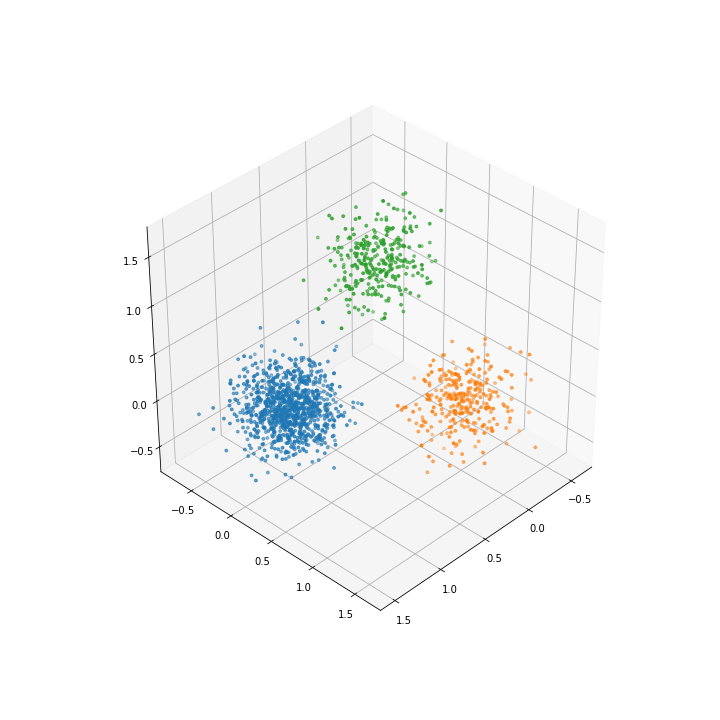

In [23]:
from whynot.simulators.repeated_classification.experiments import sample_initial_states_median
rng = np.random.RandomState(5)

init_state = sample_initial_states_median(rng)
index = 0
group_features = []
for p in init_state.populations:
    group_features.append(init_state.features[index:index+p])
    index += p

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.view_init(elev=37, azim=44)

for g in group_features:
    x, y, z = zip(*g)
    ax.scatter3D(x, y, z, s=8)

In [1]:
import whynot as wn
import numpy as np
from whynot import repeated_classification

repeated_classification.MedianEstimationExperiment.run(1)


0: expected pops [1763.0291  473.6134  470.3503], risks [0.2629 0.5738 0.5506], params [0.6538 0.1713 0.1695]
20: expected pops [5011.3615  601.2402  607.2913], risks [0.2216 0.6949 0.7065], params [0.8089 0.0899 0.106 ]
40: expected pops [5078.013   599.2435  603.2358], risks [0.216  0.6792 0.6814], params [0.8096 0.0934 0.0891]
60: expected pops [5075.9921  598.3903  605.8382], risks [0.2134 0.6926 0.6756], params [0.8033 0.1009 0.0873]
80: expected pops [5092.1612  595.6738  593.5897], risks [0.2163 0.6958 0.6823], params [0.8054 0.0929 0.094 ]
100: expected pops [5118.597   611.5346  593.9166], risks [0.2174 0.6708 0.7097], params [0.8056 0.0913 0.0919]
120: expected pops [5126.7475  591.2798  597.7295], risks [0.2136 0.7167 0.6919], params [0.8124 0.1087 0.0881]
140: expected pops [5111.5864  595.4863  600.8806], risks [0.2149 0.7024 0.7156], params [0.8134 0.0889 0.0831]
160: expected pops [5099.3511  595.6381  605.9089], risks [0.2189 0.6888 0.669 ], params [0.8101 0.0878 0.085

Dataset(covariates=array([[0.60170019, 0.21340439, 0.20397633]]), treatments=array([0]), outcomes=array([0.72056836]), true_effects=array([-0.21986478]), causal_graph=None)

two gaussians:
logistic regression with not 0-1 loss
different retention




Walk through how to run this experiment

Intervention on retention dynamics

some kind of dynamic intervention to showcase more of whynot

performative prediction

In [ ]:
def construct_config_median():
    """Experimental config."""
    return repeated_classification.Config(
        K=3,
        min_proportion=0.15,
        baseline_growth=np.array([1000, 300, 300]),
        # group_distributions=[left_gaussian_dist_1d, right_gaussian_dist_1d],
        group_distributions=[median_dist_0, median_dist_1, median_dist_2],
        classifier_func=constant,
        loss=squared_loss,
        user_retention=exponential_retention,
        train_classifier=erm,
        end_time=200,
    )

In [25]:
from whynot.dynamics import DynamicsExperiment

MedianEstimationExperiment = DynamicsExperiment(
    name="MedianEstimationExperiment",
    simulator=repeated_classification,
    simulator_config=construct_config_median,
    intervention=repeated_classification.Intervention(time=0, train_classifier=dro),
    state_sampler=sample_initial_states_median,
    propensity_scorer=0.5,
    outcome_extractor=extract_outcomes,
    covariate_builder=lambda run: 0,  # TODO: change
)

NameError: name 'construct_config_median' is not defined